In [268]:
#import os
#from os.path import basename
#if basename(os.getcwd()) == 'notebooks':
#    os.chdir('../')

In [269]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [270]:
from zero_schelling_demo import agent
from zero_schelling_demo.init_grid import init as init_grid
from zero_schelling_demo import graph
from zero_schelling_demo.model import Model
from zero_schelling_demo.imports import *

In [271]:
MIN_LIKE_NEIGHBORS_HAPPY = 1
N_AGENTS = 500
SIZE_GRID = int(np.sqrt(N_AGENTS * 15))

rm: cannot remove '/l/tmp/schelling/*png': No such file or directory


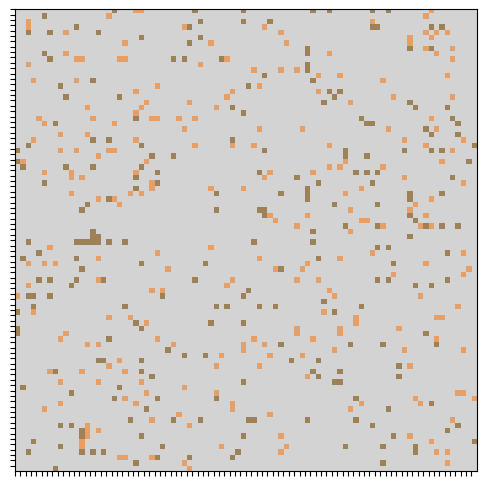

done, 500 out of 500 are happy. that took 317 out of iteration max 500 steps. 


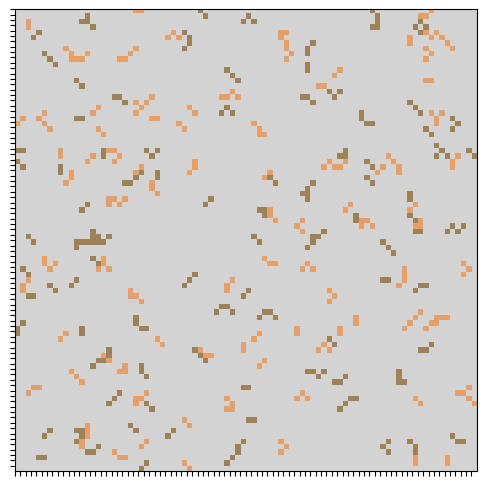

In [274]:
from IPython.display import display

fpo = '/l/tmp/schelling'
ex(f"rm {fpo}/*png")
model = Model(MIN_LIKE_NEIGHBORS_HAPPY, SIZE_GRID, N_AGENTS)

display(model.plot())
model.solve(graphs=True, fp_graphs=fpo)

display(model.plot())

# Make GIF

In [278]:
from PIL import Image

# List of image file paths
image_files = list(sorted(glob('/l/tmp/schelling/*png')))
image_files[:10]

['/l/tmp/schelling/1723754808.624489 - schelling image.png',
 '/l/tmp/schelling/1723754808.836693 - schelling step 1.png',
 '/l/tmp/schelling/1723754809.033955 - schelling step 2.png',
 '/l/tmp/schelling/1723754809.231245 - schelling step 3.png',
 '/l/tmp/schelling/1723754809.426607 - schelling step 4.png',
 '/l/tmp/schelling/1723754809.63733 - schelling step 5.png',
 '/l/tmp/schelling/1723754809.828567 - schelling step 6.png',
 '/l/tmp/schelling/1723754810.014969 - schelling step 7.png',
 '/l/tmp/schelling/1723754810.202681 - schelling step 8.png',
 '/l/tmp/schelling/1723754810.388082 - schelling step 9.png']

In [279]:
# Open images and store them in a list
images = [Image.open(image) for image in image_files]

# Save as a GIF
images[0].save(
    '/l/tmp/output.gif',  # Output file name
    save_all=True,
    append_images=images[1:],  # Appending the rest of the images
    duration=500,  # Duration for each frame in milliseconds
    loop=1  # 0 means loop forever
)

In [282]:
from moviepy.editor import VideoFileClip

def gif_to_video(input_gif, output_video):
    # Load the GIF file
    clip = VideoFileClip(input_gif)
    
    # Write the video file
    clip.write_videofile(output_video, codec='libx264')

# Example usage
gif_to_video('/l/tmp/output.gif', '/l/tmp/output_video.mp4')


[autoreload of decorator failed: Traceback (most recent call last):
  File "/home/zero/miniconda3/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/zero/miniconda3/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "/home/zero/miniconda3/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/home/zero/miniconda3/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 309, in update_function
    setattr(old, name, getattr(new, name))
ValueError: ContextManager() requires a code object with 3 free vars, not 0
]


The history saving thread hit an unexpected error (NameError("name 'fix' is not defined")).History will not be written to the database.
Moviepy - Building video /l/tmp/output_video.mp4.
Moviepy - Writing video /l/tmp/output_video.mp4



Moviepy - Done !
Moviepy - video ready /l/tmp/output_video.mp4


# Scratchpad

happy: 487
happy: 489


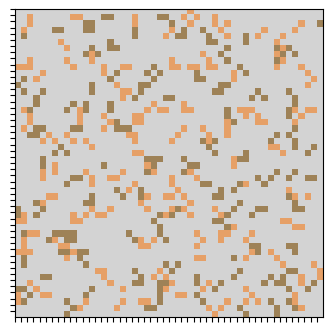

In [219]:
print('happy:', model.count_happy())
model.step()
fig = model.plot(figsize=4, showgrid=False)
print('happy:', model.count_happy())
fig

In [53]:
id='65f88cd1-4d72-431f-83e6-768748d48b4d'
g = model.grid

for i in range(g.shape[0]):
    for j in range(g.shape[1]):
        if g[i,j] != 0:
            if g[i,j].id == id:
                break
a = g[i,j]
print(a)

Agent(min_like_neighbors_happy=1, position=(21, 1), group=1, id='65f88cd1-4d72-431f-83e6-768748d48b4d')


In [58]:
a.get_locs(model.grid)

[(21, 0), (20, 2), (20, 0), (21, 2), (20, 1)]

In [44]:
grid = model.grid
a = pd.Series(grid[grid != 0]).sample().iloc[0]
a.eval_neighbors(grid)
print(a)
a.n_similar_neighbors

Agent(min_like_neighbors_happy=1, position=(21, 1), group=1, id='65f88cd1-4d72-431f-83e6-768748d48b4d')


Exception: index 22 is out of bounds for axis 0 with size 22

In [ ]:
a = grid[4,1]
a

In [ ]:
a.get_locs(grid)

In [ ]:
from copy import deepcopy as copy
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

grid_viz = copy(grid)

for i in range(grid_viz.shape[0]):
    for j in range(grid_viz.shape[1]):
        a = grid_viz[i,j]
        if a:
            grid_viz[i,j] = a.group
grid_viz = grid_viz.astype(int)

matrix = grid_viz

colors = ['#D3D3D3', '#9E8257', '#241212']  # White for 0, Orange for 1, Blue for 2
cmap = ListedColormap(colors)


# Plot the matrix
plt.figure(figsize=(10, 8))  # Optional: Set the size of the figure
plt.imshow(matrix, cmap=cmap, vmin=0, vmax=2)

# Add a color bar to show the mapping of values to colors
plt.colorbar(ticks=[0, 1, 2])

# Optional: Add grid lines
plt.grid(False)  # Disable grid if you don't want lines

# Show the plot
plt.show()

In [ ]:
grid_viz.astype(int)

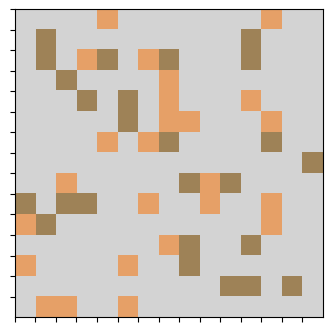

done, 50 out of 50 are happy. that took 8 out of 1500 possible steps. 


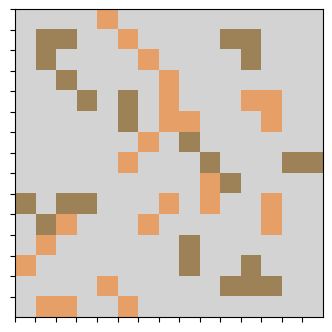

In [234]:
from IPython.display import display

model = Model(MIN_LIKE_NEIGHBORS_HAPPY, SIZE_GRID, N_AGENTS)
fig = model.plot(figsize=4, showgrid=False)
display(fig)

model.solve()
fig = model.plot(figsize=4, showgrid=False)
display(fig)